In [1]:
# Import basic libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
import plotly.express as px
from matplotlib import pyplot as plt

from sklearn.metrics import euclidean_distances, silhouette_score, pairwise_distances, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Projet_DATAMining/spotify_songs.csv'
data = pd.read_csv(path)
data.head(5)

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
# General information about numerical features of the
data.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000

In [6]:
data.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [15]:
# Count duplicates
data.duplicated().sum()

0

In [16]:
# Viewing rows and columns
data.shape

(32833, 23)

In [7]:
# Top 5 Most positive songs
df_hapiness = data.sort_values(by='valence', ascending=False)
df_hapiness[['track_artist','track_album_name','playlist_name','playlist_genre','valence']].head(5)

track_artist          track_album_name  \
13531                  War      The Very Best Of War   
22762                  War  Why Can't We Be Friends?   
12710  The Doobie Brothers          Minute By Minute   
26302     1986 Omega Tribe             Crystal Night   
31680         Soulsearcher          Can't Get Enough   

                                           playlist_name playlist_genre  \
13531                                  70's Classic Rock           rock   
22762  The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...            r&b   
12710                                    Soft Rock Drive           rock   
26302                   Japanese Funk/Soul/NEO/Jazz/Acid            r&b   
31680     House/Electro/Progressive/Disco/Lofi/Synthwave            edm   

       valence  
13531    0.991  
22762    0.990  
12710    0.985  
26302    0.984  
31680    0.983

In [8]:
# Grouping by 'playlist_subgenre' and calculating average 'danceability'
subgenre_danceability = data.groupby('playlist_subgenre')['danceability'].mean().sort_values(ascending=False)

# Plotting with improvements
plt.figure(figsize=(10, 6))
sns.barplot(x=subgenre_danceability.values, y=subgenre_danceability.index, palette='viridis')

# Adding data labels
for index, value in enumerate(subgenre_danceability.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', color='black')

# Enhancing readability
plt.title('Average Danceability by Playlist Subgenre', fontsize=16)
plt.xlabel('Average Danceability', fontsize=12)
plt.ylabel('Playlist Subgenre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adding gridlines for comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


In [9]:
import plotly.graph_objects as go

import plotly.express as px

# Préparation de données pour le graphe de sunburst
genre_subgenre = data.groupby(['playlist_genre', 'playlist_subgenre']).size().reset_index(name='items')
labels = np.append(genre_subgenre['playlist_genre'].unique(), genre_subgenre['playlist_subgenre'])
parents = np.append(['' for _ in genre_subgenre['playlist_genre'].unique()], genre_subgenre['playlist_genre'])
means = np.append(data.groupby(['playlist_genre']).track_popularity.mean().values, data.groupby(['playlist_genre', 'playlist_subgenre']).track_popularity.mean().values)

# Réprésenatation graphique
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=means,
    marker=dict(colors=px.colors.sequential.Redor)))
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title_text='Popularité des genres et subgenres',
    title_x=0.5)
fig.show()

In [10]:
import plotly.express as px

genres = pd.DataFrame({
    'playlist_subgenre': '',
    'playlist_genre': genre_subgenre['playlist_genre'].unique(),
    'value': data.groupby(['playlist_genre']).size().values
})

treemap_data = pd.concat([genres, genre_subgenre])
fig = px.treemap(

    treemap_data,
    path=['playlist_genre', 'playlist_subgenre'],
    values='items',
    color='items',
    color_continuous_scale='RdYlGn'
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    title="Genres musicaux selon le nombre d'articles disponibles"
)
fig.show()

In [11]:
# Extracting the year from 'track_album_release_date'
data['year'] = pd.to_datetime(data['track_album_release_date'], errors='coerce').dt.year

# Grouping by year and calculating average loudness
average_loudness = data.groupby('year')['loudness'].mean()

# Removing the most recent year if it's incomplete
average_loudness = average_loudness[average_loudness.index < 2023]  # Adjust the year based on your dataset

# Smoothing the trend with a rolling average
average_loudness_smoothed = average_loudness.rolling(window=5, center=True).mean()

# Plotting the smoothed trend with annotations and color coding
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_loudness_smoothed.index, y=average_loudness_smoothed.values, marker='o', color='green')
plt.title('Average Loudness of Tracks Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Loudness (dB)', fontsize=12)
plt.grid(True)

# Adding annotations for key points
min_year = average_loudness.idxmin()
min_value = average_loudness.min()
plt.annotate(f'Minimum in {min_year}', xy=(min_year, min_value), xytext=(min_year + 5, min_value - 2),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

# Highlighting eras
plt.fill_between(average_loudness_smoothed.index, average_loudness_smoothed.values, where=average_loudness_smoothed.index < 2000, color='lightgreen', alpha=0.5, label='Pre-2000')
plt.fill_between(average_loudness_smoothed.index, average_loudness_smoothed.values, where=average_loudness_smoothed.index >= 2000, color='coral', alpha=0.5, label='2000 and After')

plt.legend()
plt.show()


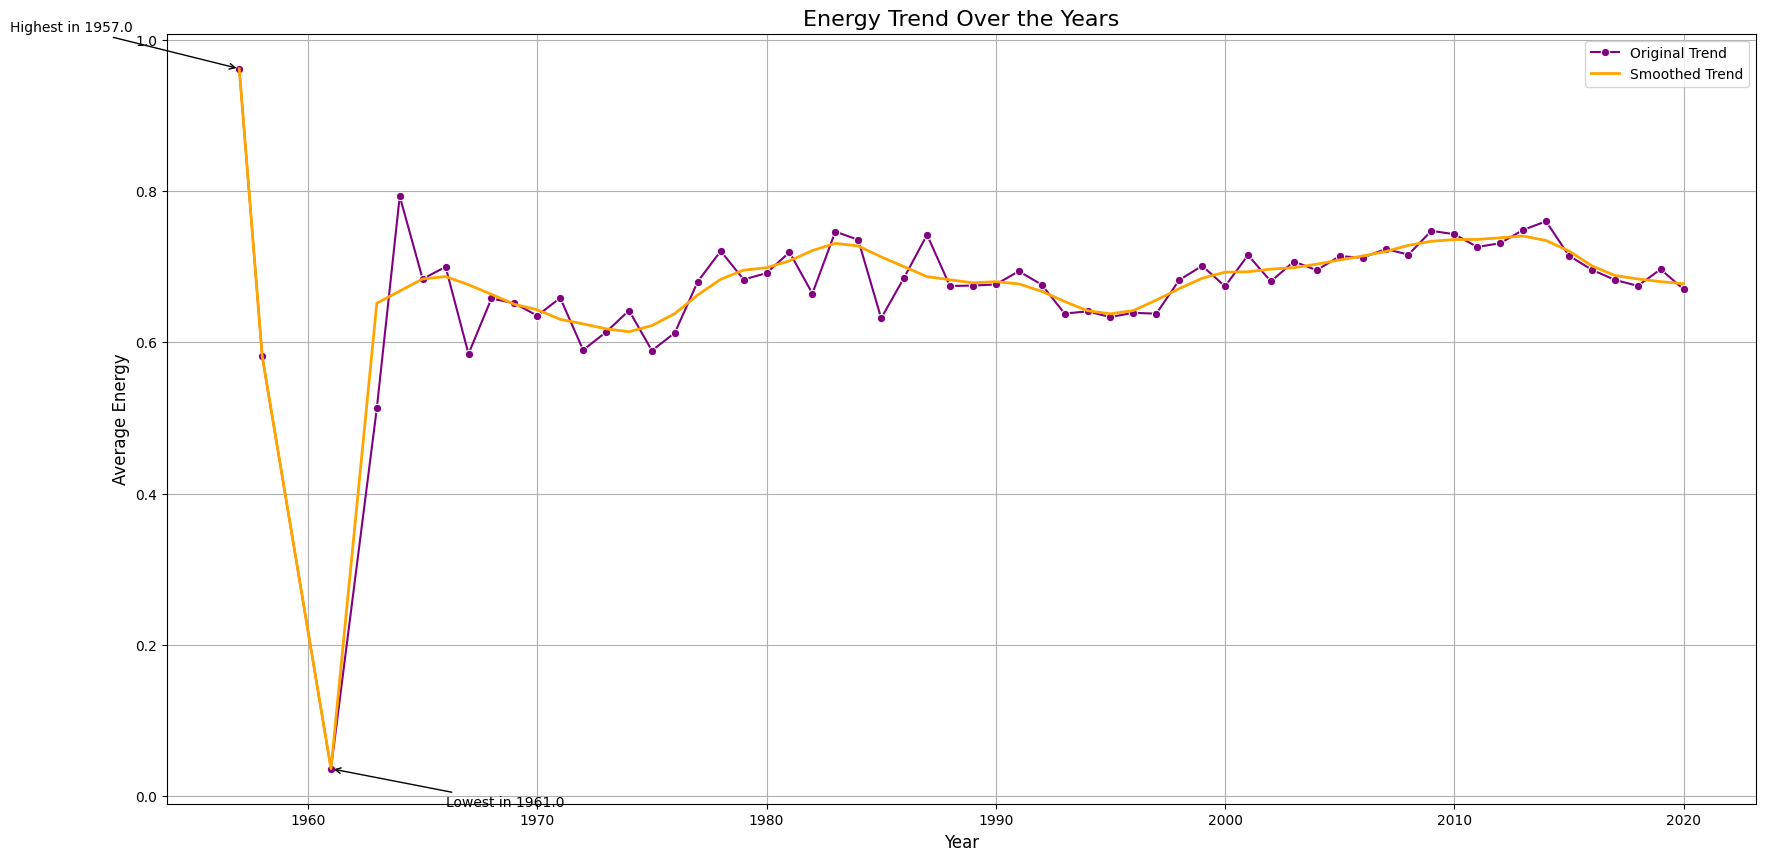

In [12]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Extracting year from 'track_album_release_date'
data['year'] = pd.to_datetime(data['track_album_release_date'], errors='coerce').dt.year

# Calculate the average energy for each year
yearly_energy = data.groupby('year')['energy'].mean()

# Removing the most recent year if it's incomplete
yearly_energy = yearly_energy[yearly_energy.index < 2023]

# Calculate smoothed trend line
smoothed = lowess(yearly_energy.values, yearly_energy.index, frac=0.1)

plt.figure(figsize=(20.5, 10))
sns.lineplot(x=yearly_energy.index, y=yearly_energy.values, marker='o', color='purple', label='Original Trend')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='orange', lw=2, label='Smoothed Trend')
plt.title('Energy Trend Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Energy', fontsize=12)

# Annotate peak and trough points
max_year = yearly_energy.idxmax()
max_value = yearly_energy.max()
plt.annotate(f'Highest in {max_year}', xy=(max_year, max_value), xytext=(max_year - 10, max_value + 0.05),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

min_year = yearly_energy.idxmin()
min_value = yearly_energy.min()
plt.annotate(f'Lowest in {min_year}', xy=(min_year, min_value), xytext=(min_year + 5, min_value - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Calculate the average rating and number of tracks for each artist
artist_stats = data.groupby('track_artist').agg(
    average_rating=('track_popularity', 'mean'),
    track_count=('track_popularity', 'size')
).sort_values(by='average_rating', ascending=False).head(10)

# Plotting a grouped horizontal bar chart
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting average rating
bar_width = 0.4
y_pos = range(len(artist_stats))
ax1.barh(y_pos, artist_stats['average_rating'], bar_width, color='purple', label='Average Rating')

# Adding a secondary bar for track count
ax2 = ax1.twiny()
ax2.barh([p + bar_width for p in y_pos], artist_stats['track_count'], bar_width, color='orange', label='Track Count')

# Enhancing chart aesthetics
ax1.set_yticks([p + bar_width / 2 for p in y_pos])
ax1.set_yticklabels(artist_stats.index)
ax1.set_xlabel('Average Rating', fontsize=12)
ax2.set_xlabel('Track Count', fontsize=12)
plt.title('Top 10 Artists With Highest Average Rating and Track Count', fontsize=16)
ax1.invert_yaxis()  # Highest-rated artist at the top

# Adding legends
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

# Adding data labels
for i, (avg, count) in enumerate(zip(artist_stats['average_rating'], artist_stats['track_count'])):
    ax1.text(avg + 0.2, i, f'{avg:.1f}', va='center', ha='left', fontsize=9, color='black')
    ax2.text(count + 2, i + bar_width, f'{count}', va='center', ha='left', fontsize=9, color='black')

plt.tight_layout()
plt.show()


In [15]:
from matplotlib.colors import LinearSegmentedColormap

numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
categorical_columns = data.select_dtypes(exclude=np.number).columns.tolist()
# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)
# heatmap by musics
plt.figure(figsize=(10,7))
sns.heatmap(data=data[numerical_columns].corr(),  cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)

<Axes: >

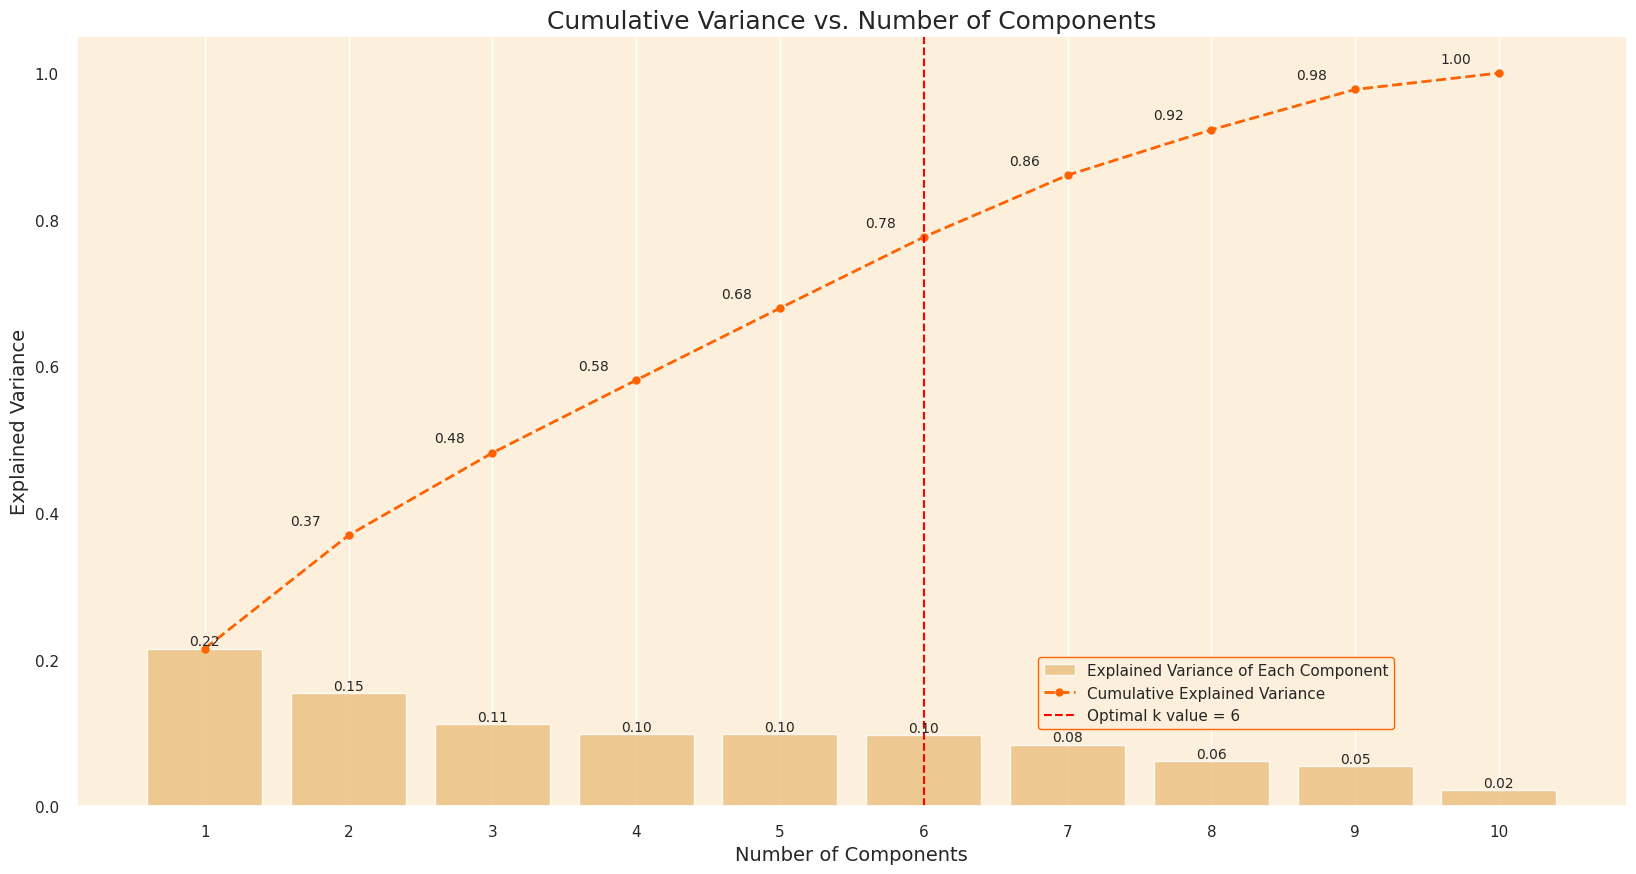

In [19]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to be included in PCA (your numerical features)
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Select the relevant features from your data (assuming 'data' is your dataframe)
X = data[features]

# Handle any missing values by filling with mean or dropping rows
X = X.fillna(X.mean())  # You can also use X.dropna() if you'd prefer to remove missing rows

# Scaling the features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA().fit(X_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (you can adjust this based on your analysis)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}')

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,
           edgecolor='#ff6200')

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')
plt.show()


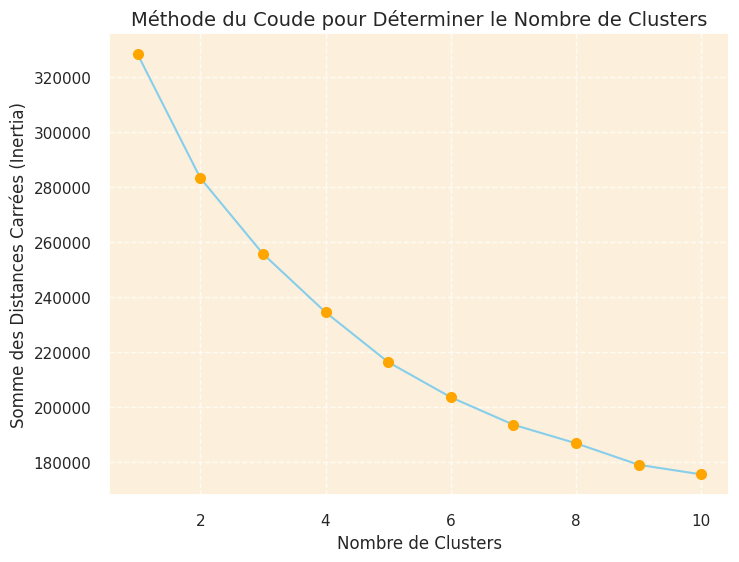

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Déterminer le nombre optimal de clusters en utilisant la méthode du coude
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Tracer le graphique de la méthode du coude avec des couleurs personnalisées
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, color='skyblue', marker='o', markerfacecolor='orange', markersize=8, linestyle='-')
plt.xlabel('Nombre de Clusters', fontsize=12)
plt.ylabel('Somme des Distances Carrées (Inertia)', fontsize=12)
plt.title('Méthode du Coude pour Déterminer le Nombre de Clusters', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**CANT DETERMINE OPTIMAL NUMBER OF CLUSTER SO WE USE SILHOUETE SCORE**

In [19]:

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def silhouette_analysis(X_scaled, start_k, stop_k, figsize=(15, 10)):


    # Initialize lists to store silhouette scores
    silhouette_scores = []

    # Set the plot size
    plt.figure(figsize=figsize)

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        # Fit the KMeans model
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(X_scaled)

        # Predict the cluster labels
        labels = km.labels_

        # Calculate silhouette score
        score = silhouette_score(X_scaled, labels)
        silhouette_scores.append(score)

    # Plotting the silhouette scores against k (with lines connecting points)
    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o', color='orange', linestyle='-', linewidth=2, markersize=8)

    # Plot customization
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)', fontsize=14)
    plt.ylabel('Silhouette Score', fontsize=14)
    plt.title('Silhouette Score for Different k Values', fontsize=16)
    plt.grid(True)

    # Show the plot
    plt.show()

    # Find and print the best k based on silhouette score
    best_k = start_k + silhouette_scores.index(max(silhouette_scores))
    print(f"Optimal k based on Silhouette Score is: {best_k}")

    return best_k, silhouette_scores

# Example usage (for your dataset):
# Assuming `X_scaled` is the scaled data you want to use for clustering
    best_k, silhouette_scores = silhouette_analysis(X_scaled, start_k=2, stop_k=7)

    plt.grid(True)

    # Show the plot
    plt.show()

    # Find and print the best k based on silhouette score
    best_k = start_k + silhouette_scores.index(max(silhouette_scores))
    print(f"Optimal k based on Silhouette Score is: {best_k}")

    return best_k, silhouette_scores

# Example usage (for your dataset):
# Assuming `X` is the scaled data you want to use for clustering
best_k, silhouette_scores = silhouette_analysis(X, start_k=3, stop_k=7)


Optimal k based on Silhouette Score is: 3


In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['clustered'] = kmeans.fit_predict(X_scaled)
kmeans

KMeans(n_clusters=3, random_state=42)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of songs in each cluster
cluster_counts = data['clustered'].value_counts().sort_values(ascending=False)

# Calculate the percentage of each cluster
total_songs = cluster_counts.sum()
cluster_percentages = (cluster_counts / total_songs) * 100

# Plot the distribution of clusters with percentages using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=[f'Cluster {i} ({count} - {percentage:.1f}%)' for i, (count, percentage) in enumerate(zip(cluster_counts, cluster_percentages))],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('deep', len(cluster_counts)))

# Title and customization for the pie chart
plt.title('Distribution of Songs by Cluster', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


**PCA**

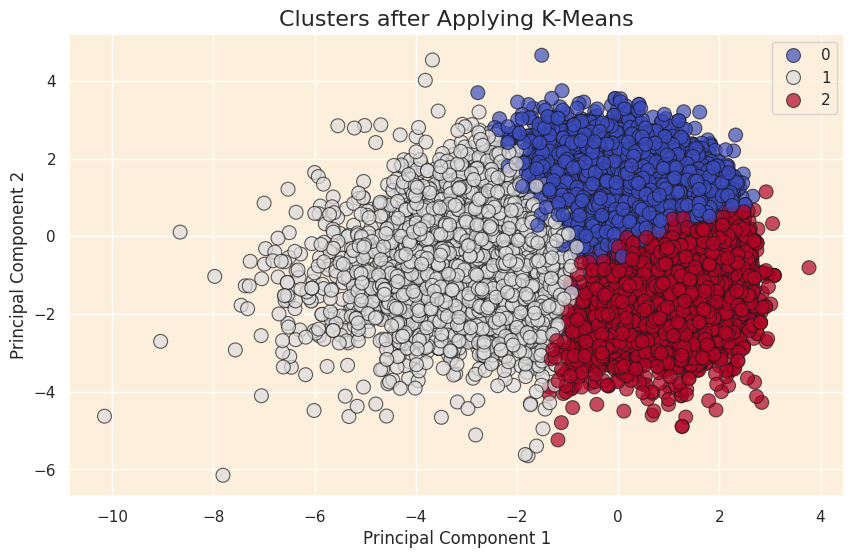

In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Apply PCA with 2 components for visualization
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['clustered'] = clusters

# Plotting the clusters in 2D using scatter plot with hue (remove cluster centers and change colors)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0],
                y=X_pca[:, 1],
                hue=data['clustered'],
                palette='coolwarm',  # Changed color palette
                alpha=0.7,
                edgecolor='k',
                s=100)

# Title and labels
plt.title('Clusters after Applying K-Means', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Displaying the legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [24]:
def recommend_songs_by_cluster(song_name, data, num_recommendations=25):

    # Search for the selected song, case-insensitively
    selected_song = data[data['track_name'].str.lower() == song_name.lower()]

    if selected_song.empty:
        print(f"'{song_name}' not found in the dataset.")
        return None

    # Get the cluster of the selected song
    cluster_id = selected_song['clustered'].values[0]

    # Find all songs in the same cluster
    recommended_songs = data[data['clustered'] == cluster_id]

    # Exclude the selected song from recommendations
    recommended_songs = recommended_songs[recommended_songs['track_name'] != song_name]

    # Return the top recommended songs, limited to num_recommendations
    return recommended_songs[['track_name', 'track_artist']].head(num_recommendations)



recommendations = recommend_songs_by_cluster('Hate Me - R3HAB Remix', data, num_recommendations=10)
if recommendations is not None:
    print(recommendations)


                                           track_name      track_artist
3                   Call You Mine - Keanu Silva Remix  The Chainsmokers
6                     Never Really Over - R3HAB Remix        Katy Perry
7            Post Malone (feat. RANI) - GATTÜSO Remix         Sam Feldt
8              Tough Love - Tiësto Remix / Radio Edit            Avicii
9                 If I Can't Have You - Gryffin Remix      Shawn Mendes
13     SOS - Laidback Luke Tribute Remix / Radio Edit            Avicii
14  Summer Days (feat. Macklemore & Patrick Stump ...     Martin Garrix
16                 All My Friends - Eden Prince Remix       AJ Mitchell
19                         Let It Be Me - Sondr Remix        Steve Aoki
20               Heaven - David Guetta & MORTEN Remix            Avicii


**COSINE SIMILARITY**

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import pandas as pd

def recommend_songs(song_name, data, features, num_recommendations=10):

    # Check if all required features are present in the dataset
    if not set(features).issubset(data.columns):
        raise ValueError(f"Dataset does not contain all required features: {features}")

    # Standardize the features
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[features])

    # Verify that the song exists in the dataset
    song_index = data[data['track_name'].str.contains(song_name, case=False, na=False)]
    if song_index.empty:
        print(f"'{song_name}' not found in the dataset.")
        return None

    # Extract the index of the selected song
    selected_song_index = song_index.index[0]
    song_features = data_scaled[selected_song_index:selected_song_index + 1]

    # Compute cosine similarity between the selected song and all other songs
    similarities = cosine_similarity(song_features, data_scaled).flatten()

    # Add similarity scores to a copy of the dataset
    data_with_similarity = data.copy()
    data_with_similarity['similarity'] = similarities

    # Exclude the selected song and songs with the same name
    data_with_similarity = data_with_similarity[data_with_similarity['track_name'] != song_name]

    # Drop duplicates based on track_name (keep only the first occurrence)
    data_with_similarity = data_with_similarity.drop_duplicates(subset='track_name')

    # Sort by similarity and return the top N recommendations
    recommendations = data_with_similarity.sort_values(by='similarity', ascending=False)

    # Return the top N recommendations
    return recommendations[['track_name', 'track_artist', 'similarity']].head(num_recommendations)

# Example Usage
features = ['tempo', 'duration_ms', 'danceability', 'energy']  # Replace with features in your dataset

# Test the function
recommendations = recommend_songs("Shape of You", data, features, num_recommendations=10)

if recommendations is not None:
    print(recommendations)


                                              track_name     track_artist  \
6316   Do It When I'm In It (feat. Jermaine Dupri, Oz...       Snoop Dogg   
18484                                        Shaky Shaky     Daddy Yankee   
13599                                  Every Little Step      Bobby Brown   
18670                              African Woman So Fine       HARRI BEST   
7154                                            They B's        Geto Boys   
6743                                      Illegal Weapon     Garry Sandhu   
24526                          In My Bed - So So Def Mix         Dru Hill   
18248                                     Eso Que Me Das  Juan Pablo Vega   
21949               Rich (feat. D Block Europe & Offset)         The Plug   
19187                                       Métele Sazón       Luny Tunes   

       similarity  
6316     0.999270  
18484    0.998831  
13599    0.996846  
18670    0.996729  
7154     0.996128  
6743     0.995563  
24526    0.9

In [43]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Prepare your dataset: Generate a transaction matrix (playlist -> songs)
playlist_tracks_matrix = data.groupby('playlist_name')['track_name'].apply(list).reset_index()

# Let's print a sample of the data to inspect it
print(playlist_tracks_matrix.head())

# Function to create a one-hot encoded transaction matrix
def create_transaction_matrix(playlist_tracks_matrix):
    transaction_matrix = []
    all_songs = list(set([song for playlist in playlist_tracks_matrix['track_name'] for song in playlist]))  # List of all unique songs
    print(f"Total unique songs: {len(all_songs)}")  # Debug: Check how many unique songs exist
    for _, row in playlist_tracks_matrix.iterrows():
        transaction = [1 if song in row['track_name'] else 0 for song in all_songs]
        transaction_matrix.append(transaction)
    return pd.DataFrame(transaction_matrix, columns=all_songs)

# Create the transaction matrix
transaction_matrix = create_transaction_matrix(playlist_tracks_matrix)

# Check if the transaction matrix has meaningful data
print(transaction_matrix.head())

# 2. Apply Apriori algorithm with a lower min_support threshold to ensure we capture more frequent itemsets
min_support_value = 0.01  # Lowering support to 1% to capture more frequent itemsets
frequent_itemsets = apriori(transaction_matrix, min_support=min_support_value, use_colnames=True)

# 3. Generate association rules based on the frequent itemsets
# Setting min_lift to a lower value to capture more associations
association_rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5,num_itemsets=2)

# Sort the results by Lift (for better insights)
association_rules_df.sort_values(by='lift', ascending=False, inplace=True)

# Show the top association rules
print(association_rules_df.head())


                                       playlist_name  \
0                                   "Permanent Wave"   
1                                      10er Playlist   
2                           1987-1997 OLD SKOOL JAMZ   
3                                   2000's hard rock   
4  2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016...   

                                          track_name  
0  [Just Can't Get Enough - 2006 Remaster, Tender...  
1  [Can't Feel My Face, Cheap Thrills, Hey Brothe...  
2  [Romantic, Mercedes Boy - Single Remix Version...  
3  [Crawling In The Dark, The Hell Song, Judith, ...  
4  [10,000 Hours (with Justin Bieber), Lose You T...  
Total unique songs: 23450
   Soundclash  Takes A Little Time  Just Luv Machine  Volatile  \
0           0                    0                 0         0   
1           0                    0                 0         0   
2           0                    0                 0         0   
3           0                    0         